<a href="https://colab.research.google.com/github/AlieZVzz/Tianchi-Data-Analysis/blob/master/%E6%95%B0%E6%8D%AE%E6%8E%A2%E7%B4%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

In [5]:
"""
读取数据集
"""
test_data = pd.read_csv('drive/MyDrive/data_format1/test_format1.csv')
train_data = pd.read_csv('drive/MyDrive/data_format1/train_format1.csv')

user_info = pd.read_csv('drive/MyDrive/data_format1/user_info_format1.csv')
user_log = pd.read_csv('drive/MyDrive/data_format1/user_log_format1.csv')

#user_info = pd.read_csv('./data_format1/user_info_format1.csv').drop_duplicates()
#user_log = pd.read_csv('./data_format1/user_log_format1.csv').rename(columns={"seller_id":'merchant_id'})



In [6]:
train_data.head(5)

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [7]:
test_data.head(5)

,user_id,merchant_id,prob
0,163968,4605,NaN
1,360576,1581,NaN
2,98688,1964,NaN
3,98688,3645,NaN
4,295296,3361,NaN


In [8]:
user_info.head(5)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [9]:
user_log.head(5)

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [10]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [11]:
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int64
 1   merchant_id  260864 non-null  int64
 2   label        260864 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


In [13]:
(user_info.shape[0]-user_info['age_range'].count())/user_info.shape[0]

0.005226677982884221

In [14]:
user_info[user_info['age_range'].isna()|(user_info['age_range']==0)].count()

user_id      95131
age_range    92914
gender       90664
dtype: int64

In [33]:
user_info.groupby(['age_range'])[['user_id']].count()

,user_id
age_range,
0.0,92914
1.0,24
2.0,52871
3.0,111654
4.0,79991
5.0,40777
6.0,35464
7.0,6992
8.0,1266


In [20]:
(user_info.shape[0]-user_info['gender'].count())/user_info.shape[0]

0.01517316170403376

In [22]:
user_info[user_info['gender'].isna()|(user_info['gender']==2)].count()

user_id      16862
age_range    14664
gender       10426
dtype: int64

In [34]:
user_info.groupby(['gender'])[['user_id']].count()

,user_id
gender,
0.0,285638
1.0,121670
2.0,10426


In [35]:
user_info[user_info['gender'].isna()|(user_info['gender']==2)|user_info['age_range'].isna()|(user_info['age_range']==0)].count()

user_id      106330
age_range    104113
gender        99894
dtype: int64

In [36]:
user_log.isna().sum()

user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

正负样本数：
 label
0    244912
1     15952
Name: user_id, dtype: int64


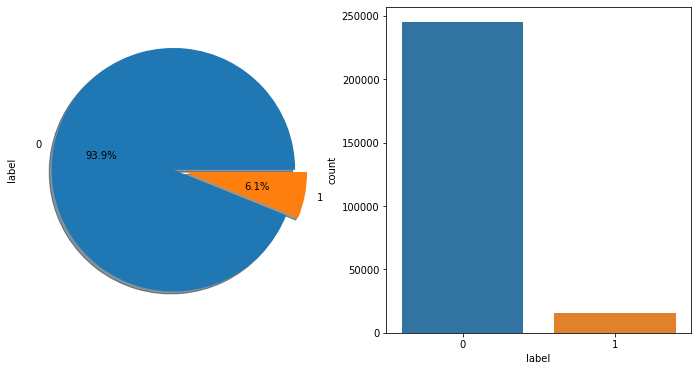

In [38]:
label_gp = train_data.groupby('label')['user_id'].count()
print('正负样本数：\n', label_gp)
_, axe = plt.subplots(1,2, figsize=(12,6))
train_data.label.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0,0.1], ax=axe[0])
sns.countplot('label', data=train_data, ax=axe[1])

In [47]:
print('选取top5店铺\n店铺\t购买次数')
print(train_data.merchant_id.value_counts().head(5))
train_data_merchant = train_data.copy()

选取top5店铺
店铺	购买次数
4044    3379
3828    3254
4173    2542
1102    2483
4976    1925
Name: merchant_id, dtype: int64


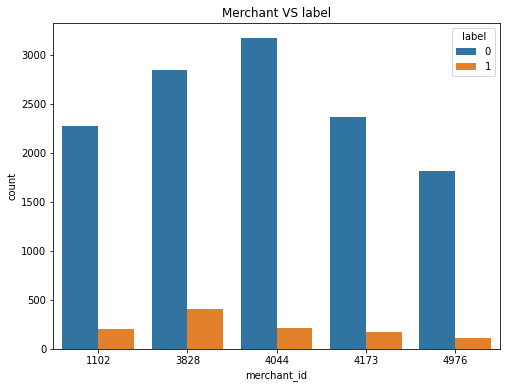

In [49]:
train_data_merchant['TOP5']=train_data_merchant['merchant_id'].map(lambda x: 1 if x in [4044, 3828, 4173, 1102, 4976] else 0)
train_data_merchant = train_data_merchant[train_data_merchant['TOP5']==1]
plt.figure(figsize=(8,6))
plt.title('Merchant VS label')
ax = sns.countplot('merchant_id', hue='label', data=train_data_merchant)
for p in ax.patches:
  height = p.get_height()

In [50]:
train_data_merchant.head()

,user_id,merchant_id,label,TOP5
7,231552,3828,1,1
33,40320,4173,0,1
34,171648,3828,0,1
61,307584,4173,0,1
63,111744,3828,0,1


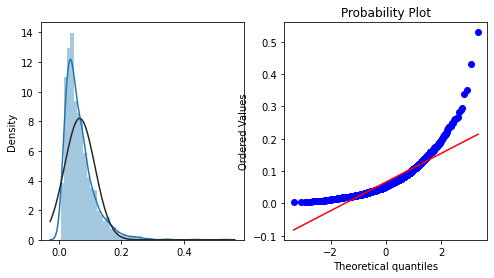

In [51]:
merchant_repeat_buy = [ rate for rate in train_data.groupby(['merchant_id'])['label'].mean() if rate <= 1 and rate > 0] 
plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.distplot(merchant_repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(merchant_repeat_buy, plot=plt) 

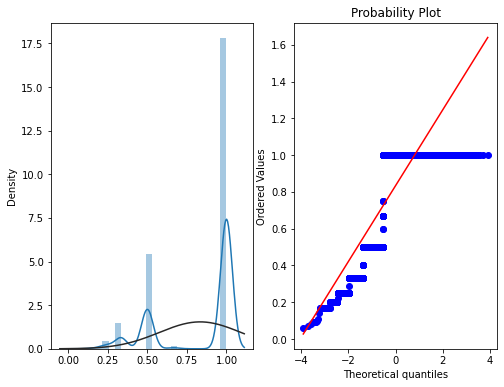

In [52]:
user_repeat_buy = [rate for rate in train_data.groupby(['user_id'])['label'].mean() if rate <= 1 and rate > 0] 

plt.figure(figsize=(8,6))

ax=plt.subplot(1,2,1)
sns.distplot(user_repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(user_repeat_buy, plot=plt)

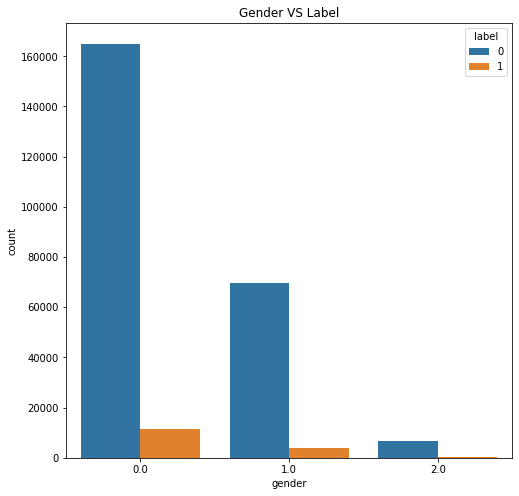

In [57]:
train_data_user_info = train_data.merge(user_info,on=['user_id'],how='left')
plt.figure(figsize=(8,8))
plt.title('Gender VS Label')
ax = sns.countplot('gender',hue='label',data=train_data_user_info)
for p in ax.patches:
    height = p.get_height()

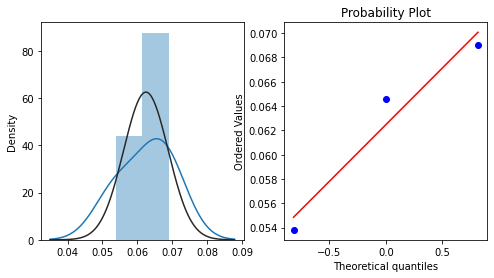

In [58]:
repeat_buy = [rate for rate in train_data_user_info.groupby(['gender'])['label'].mean()] 

plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.distplot(repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(repeat_buy, plot=plt)

In [59]:
repeat_buy

[0.06454703141474033, 0.05381257118064971, 0.06902477445224116]

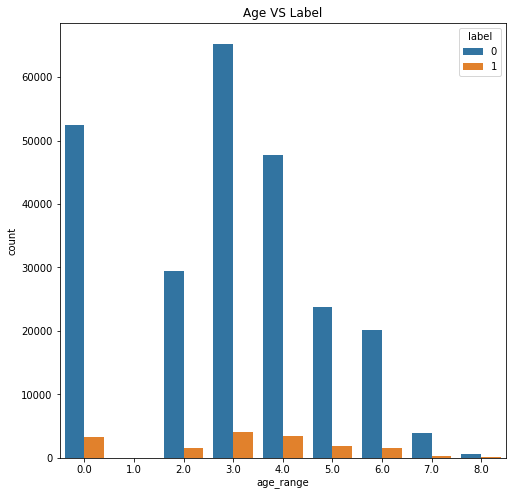

In [60]:
plt.figure(figsize=(8,8))
plt.title('Age VS Label')
ax = sns.countplot('age_range',hue='label',data=train_data_user_info)

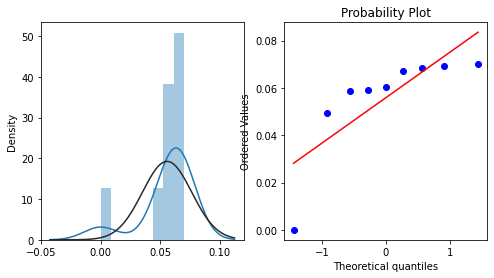

In [61]:
repeat_buy = [rate for rate in train_data_user_info.groupby(['age_range'])['label'].mean()] 

plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.distplot(repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(repeat_buy, plot=plt)

In [63]:
repeat_buy

[0.05895106524037342,
 0.0,
 0.04934571004963579,
 0.058815897591143015,
 0.06721967405094174,
 0.06998985088609572,
 0.0683378646145339,
 0.06043689320388349,
 0.06944444444444445]